1. Estimez le modèle de régression linéaire expliquant la variable « score.relation » par les variables « age », « sexe », « score.information », « amelioration.sante », « amelioration.moral », « profession »,  « service ». (le script doit inclure la vérification éventuelle des conditions de validité de la méthode utilisée)

In [2]:
data = read.csv2('../data/satisfaction_hopital.csv')

In [3]:
str(data)

'data.frame':	534 obs. of  9 variables:
 $ service           : int  3 3 3 3 3 3 3 3 3 3 ...
 $ sexe              : int  0 1 1 0 1 0 0 0 0 1 ...
 $ age               : int  41 29 83 66 84 84 60 85 28 35 ...
 $ profession        : int  4 8 2 3 NA 6 3 3 3 3 ...
 $ amelioration.sante: int  1 2 2 2 NA 3 2 3 3 3 ...
 $ amelioration.moral: int  0 3 1 0 NA 3 1 1 1 2 ...
 $ recommander       : int  1 2 2 2 NA 2 1 2 1 NA ...
 $ score.relation    : int  36 33 40 32 NA 39 31 NA 36 NA ...
 $ score.information : int  22 36 37 35 NA 28 30 NA 29 NA ...


In [4]:
# application d'une régression linéaire multiple avec des variables catégorielles
model = lm(score.relation~age+sexe+score.information+amelioration.sante+
   amelioration.moral+profession+service, data=data)
print(model)


Call:
lm(formula = score.relation ~ age + sexe + score.information + 
    amelioration.sante + amelioration.moral + profession + service, 
    data = data)

Coefficients:
       (Intercept)                 age                sexe   score.information  
          20.74420             0.04276            -0.49000             0.27390  
amelioration.sante  amelioration.moral          profession             service  
           0.65586             0.74913             0.07315             0.10190  



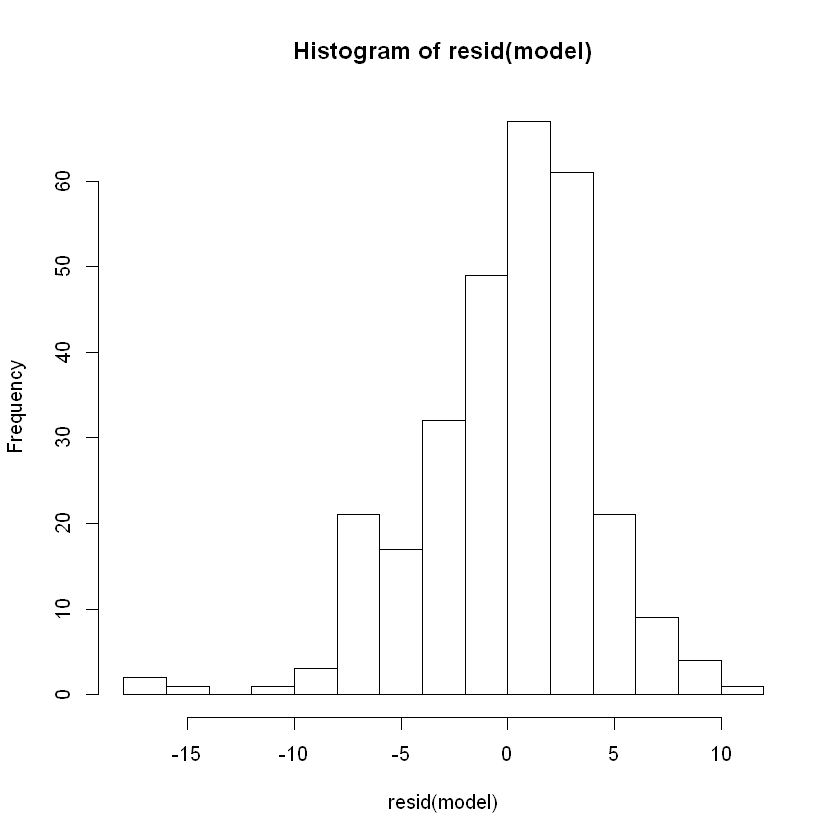

In [5]:
# vérifions la condition de validité du modèle absence de structure de corrélation du bruit
# en affichant les points résiduels du modèle précedent
hist(resid(model))
# ça n'a pas l'air centré autour de zéro, pour moi cette condition de validité n'est pas vérifiée...

##### Corrigé

In [8]:
# Il est nécessaire de recoder les variables catégorielles qui ont plus de
# deux classes pour réaliser correctement les analyses de régression
# linéaire. Les variables binaires (telles que sexe) sont correctement traitées.

data$profession.cat<-factor(data$profession)
data$amelioration.sante.cat<-factor(data$amelioration.sante)
data$amelioration.moral.cat<-factor(data$amelioration.moral)
data$service.cat<-factor(data$service)

In [9]:
mod1<-lm(score.relation~age+sexe+score.information+
         amelioration.sante.cat+amelioration.moral.cat+profession.cat+service.cat, data=data)

# On test ce modèle avec l’effet global de chacune des variables
# (incluant les variables catégorielles à plus de deux classes)

drop1(mod1,.~.,test="F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,3625.161,778.9467,NA,NA
age,1,47.95865,3673.119,780.7449,3.505788,6.225595e-02
sexe,1,25.63878,3650.799,778.9834,1.874200,1.721541e-01
score.information,1,563.44533,4188.606,818.6983,41.187972,6.342560e-10
amelioration.sante.cat,3,315.45185,3940.612,797.0601,7.686532,6.063976e-05
amelioration.moral.cat,3,593.71681,4218.877,816.7794,14.466941,9.351124e-09
profession.cat,7,129.94016,3755.101,775.1242,1.356950,2.238966e-01
service.cat,7,185.75353,3810.914,779.3881,1.939803,6.367215e-02


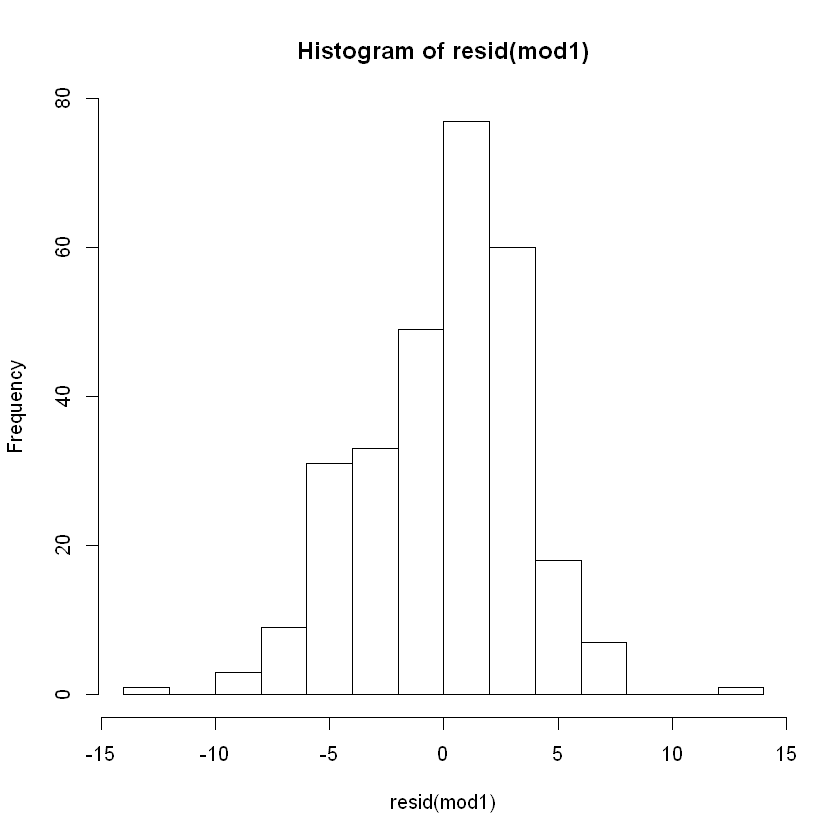

In [11]:
# Conditions de validité :
# normalité du bruit du modèle
hist(resid(mod1))
# l'histogramme a plus ou moins une courbe normale, on valide cette hypothèse
# les autres conditions de validité sont difficile à prouver (variance du bruit 
# indépendant de la variance des variables explicatives et de la variance de la variable 
# à expliquer ; "vrai" bruit (pas de corrélation interne)) et n'ont pas été démontré dans 
# le cours ; on assumera donc de par la normalité du bruit, que le modèle est validé

2. Estimez le modèle de régression logistique expliquant la variable « recommander.b » par les variables « age », « sexe », « score.information », « amelioration.sante », « amelioration.moral », « profession »,  « service ».  Notons que la variable « recommander.b » est une transformation de la variable « recommander» en une variable binaire où « recommander.b » vaut 0 si « recommander» vaut 0 ou 1, et 1 si « recommander» vaut 2. (le script doit inclure la vérification éventuelle des conditions de validité de la méthode utilisée)

In [ ]:
# recodons la variable recommander
data$recommander.b = ifelse(data$recommander == 2, 1, 0)

In [ ]:
# pour la régression logistique, nous utilisons le modèle linéaire généralisé
# la condition principale de validité du modèle étant la présence d'au moins 5 à 10
# évènement par variable explicative, on vérifie celà avec la fonction describe de prettyR

In [ ]:
library(prettyR)
describe(data)

In [ ]:
model2 = glm(recommander.b~age+sexe+score.information+amelioration.sante+
   amelioration.moral+profession+service, data=data)
print(model2)

##### Corrigé

In [13]:
# codage du recommender.b
data$recommander.b <- ifelse(data$recommander == 2, 1, 0)
# si data$recommander vaut 2, alors data$recommander.b vaut 1 ; sinon, il vaut 0
# la profession est déjà modifiée en variable qualitative, il n'y a pas besoin de rechanger cela
# la référence est toujours "agriculteur"

In [16]:
mod2 <- glm(recommander.b ~ age + sexe + score.information + amelioration.sante + 
            amelioration.moral + profession + service, data = data)

# On regarde les conditions de validité du modèle. Il faut au moins 5 à 10
# évènements par variable explicative.

table(data$recommander.b)
library("Epi")
library("prettyR")
describe(data)

# Pour la variable à expliquer, on a 136 détenus pour la classe 0 de
# « recommander.b » et 269 détenus pour la classe 1 de « recommander.b ».
# Pour les variables explicatives, on en a en fait 1 pour « age », 1 pour
# « sexe », 1 pour « score.information »,
# 3 pour « amelioration.sante.cat », 3 pour « amelioration.moral.cat »,
# 7 pour « profession.cat », 7 pour « service.cat », soit un total de 23.
# 23*5=115 et 23*10=230.
# Si l’on s’intéresse à la classe 0 de « recommander.b » (136 détenus),
# nous sommes dans la fourchette des conditions de validité. Si l’on
# s’intéresse à la classe 1 de « recommander.b » (269 détenus), nous
# sommes dans les conditions de validité.

# On teste le modèle
drop1(mod2,.~., test="Chisq")


  0   1 
136 269 

Description of data 



 Numeric 
                    mean median    var    sd valid.n
service             4.55      5   5.19  2.28     534
sexe                0.50      0   0.25  0.50     534
age                58.21     60 317.17 17.81     528
profession          4.43      4   3.06  1.75     427
amelioration.sante  2.23      2   0.59  0.77     376
amelioration.moral  1.68      1   0.90  0.95     383
recommander         1.62      2   0.31  0.56     405
score.relation     35.22     36  21.38  4.62     349
score.information  31.91     33  46.15  6.79     358
recommander.b       0.66      1   0.22  0.47     405

 Factor 
              
profession.cat      3   <NA>     4     5     6     8     2     7    1
       Count   124.00 107.00 88.00 69.00 44.00 41.00 38.00 22.00 1.00
       Percent  23.22  20.04 16.48 12.92  8.24  7.68  7.12  4.12 0.19
Mode 3 
                      
amelioration.sante.cat      3   <NA>      2     1    0
               Count   161.00 158.00 144.00 68.00 3.00
               Percent  30.15 

,Df,Deviance,AIC,scaled dev.,Pr(>Chi)
<none>,NA,57.32199,375.0709,NA,NA
age,1,57.66626,374.9511,1.8802157,1.703096e-01
sexe,1,57.77867,375.5626,2.4917063,1.144476e-01
score.information,1,62.40803,399.7639,26.6930089,2.384828e-07
amelioration.sante,1,58.11662,377.3938,4.3229307,3.760211e-02
amelioration.moral,1,57.83739,375.8815,2.8106472,9.364059e-02
profession,1,57.40262,373.5123,0.4413696,5.064621e-01
service,1,57.35998,373.2789,0.2079967,6.483421e-01
